In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import scipy.io
import glob
from scipy.interpolate import interp1d
#import seaborn as sns

In [12]:
lvl_list = glob.glob("Cravings20Puff/*_lvl.*")
time_list = glob.glob("Cravings20Puff/*_time.*")
session_list = [file.split('/')[-1].split(".")[0].split("_")[0] for file in lvl_list]
session_list

['10-Session-002',
 '15-Session-002',
 '17-Session-002',
 '19-Session-002',
 '21-Session-002',
 '23-Session-001',
 '24-Session-001',
 '25-Session-001',
 '26-Session-002',
 '28-Session-001',
 '29-Session-001',
 '3-Session-004',
 '5-Session-002',
 '7-Session-002',
 '9-Session-002']

In [25]:
puffs = np.arange(110,2500,120)
puffs.size

20

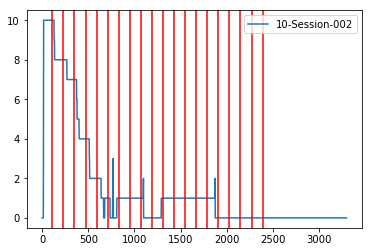

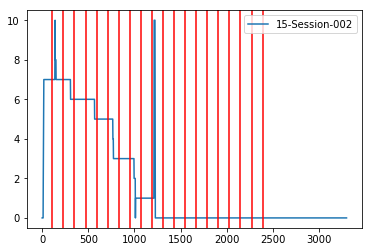

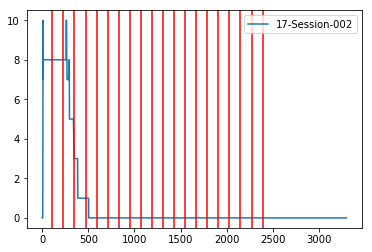

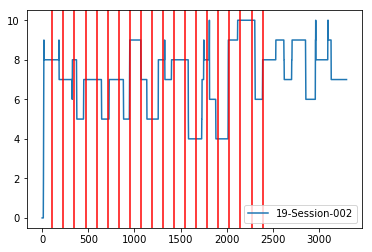

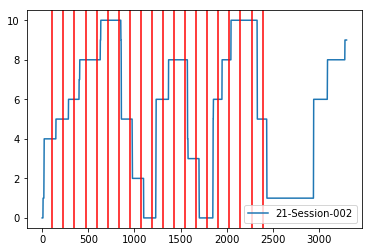

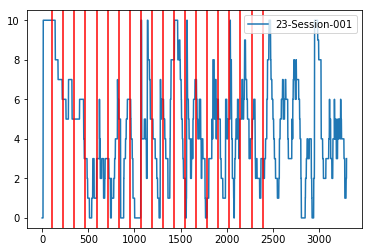

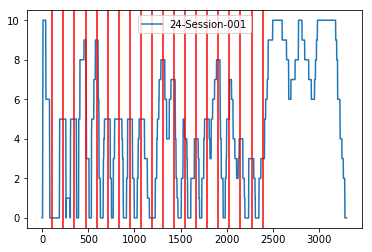

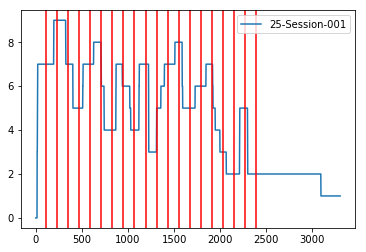

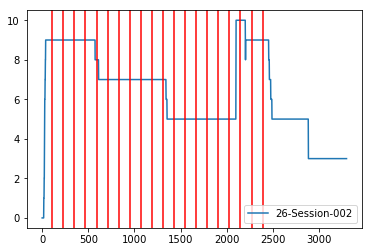

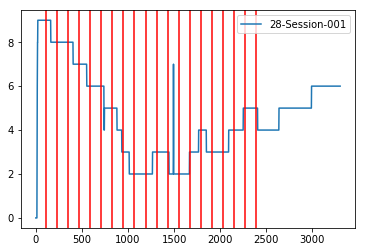

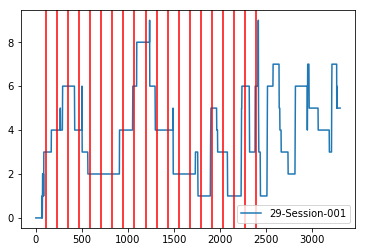

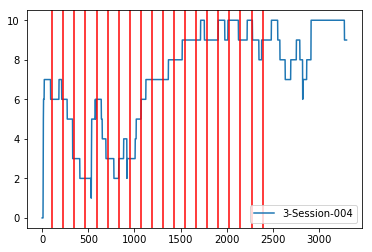

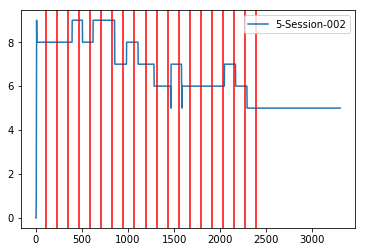

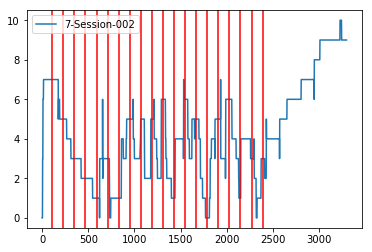

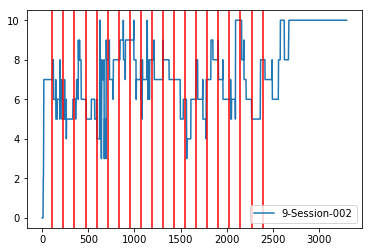

In [28]:
cravings_all = None
cravings_t_all = np.linspace(110,2510,240,endpoint=True)
for lvl,time,session in zip(lvl_list,time_list,session_list):
    cravings = np.load(lvl)
    cravings_t = np.load(time)
    if cravings_all is None:
        cravings_all = interp1d(cravings_t,cravings)(cravings_t_all)
    else:
        cravings_all = np.vstack((cravings_all,interp1d(cravings_t,cravings)(cravings_t_all)))       
    plt.figure()
    plt.plot(cravings_t,cravings,label=session)
    for p in puffs:
        plt.axvline(x=p,color="r")
    plt.legend()


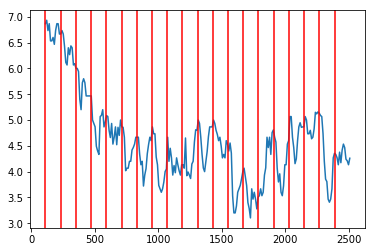

In [29]:
plt.plot(cravings_t_all,np.mean(cravings_all,axis=0))
for p in puffs:
    plt.axvline(x=p,color="r")
